# Relatório de análise VII

## Criando agrupamentos

In [88]:
import pandas as pd

In [89]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [90]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [91]:
dados['Valor'].mean()

11760.635287205676

In [92]:
# Barra da Tijuca, Botafogo, Copacabana, Flamengo, Ipanema, Leblon, Tijuca 

In [93]:
bairros = ['Barra da Tijuca', 'Botafogo', 'Copacabana', 'Flamengo', 'Ipanema', 'Leblon', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [94]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
12           Botafogo
16             Tijuca
20            Ipanema
28             Leblon
79           Flamengo
Name: Bairro, dtype: object

In [95]:
grupo_bairro = dados.groupby('Bairro')

In [96]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [97]:
grupo_bairro.groups

{'Barra da Tijuca': [5, 15, 17, 22, 31, 33, 36, 43, 44, 61, 62, 65, 69, 75, 80, 94, 108, 111, 113, 118, 131, 133, 137, 151, 154, 156, 166, 167, 174, 187, 190, 209, 216, 223, 226, 236, 239, 242, 247, 262, 268, 277, 279, 294, 295, 296, 298, 305, 311, 314, 328, 338, 339, 340, 349, 364, 370, 372, 378, 384, 391, 393, 404, 416, 436, 437, 439, 440, 443, 453, 455, 466, 467, 469, 477, 480, 488, 498, 504, 508, 516, 542, 543, 544, 545, 548, 552, 557, 559, 560, 561, 589, 592, 593, 595, 599, 601, 606, 616, 627, ...], 'Botafogo': [12, 24, 49, 88, 89, 112, 120, 128, 135, 197, 201, 227, 337, 366, 419, 420, 502, 529, 531, 550, 598, 655, 691, 725, 762, 771, 828, 833, 867, 921, 930, 934, 1014, 1051, 1088, 1099, 1118, 1124, 1135, 1149, 1174, 1210, 1214, 1232, 1260, 1292, 1305, 1314, 1327, 1358, 1393, 1424, 1429, 1466, 1528, 1540, 1591, 1642, 1668, 1683, 1712, 1754, 1755, 1801, 1827, 1836, 1839, 1866, 1936, 1945, 1971, 1986, 1995, 2004, 2045, 2082, 2085, 2097, 2099, 2100, 2104, 2114, 2165, 2166, 2182, 2196

In [98]:
for bairro, dados in grupo_bairro:
    print('{} -> {}'.format(bairro, dados.Valor.mean()))

Barra da Tijuca -> 8490.787091797378
Botafogo -> 13204.12035010941
Copacabana -> 4188.012830188679
Flamengo -> 4270.652719665272
Ipanema -> 9687.671927846673
Leblon -> 8865.901665344963
Tijuca -> 2440.495956873315


In [99]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,8490.79,3708.69
Botafogo,13204.12,932.49
Copacabana,4188.01,1151.18
Flamengo,4270.65,1097.54
Ipanema,9687.67,2231.79
Leblon,8865.90,2102.17
Tijuca,2440.50,775.26


## Estatísticas descritivas

In [100]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3889.0,8490.79,29030.85,800.0,2500.0,4500.0,8900.0,738197.0
Botafogo,914.0,13204.12,152312.01,700.0,2200.0,3200.0,4500.0,4500000.0
Copacabana,2650.0,4188.01,3912.86,100.0,2000.0,3000.0,4800.0,63000.0
Flamengo,717.0,4270.65,4658.52,800.0,1900.0,2900.0,5000.0,60000.0
Ipanema,1774.0,9687.67,10152.13,1200.0,4500.0,7000.0,11375.0,180000.0
Leblon,1261.0,8865.90,7426.27,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1113.0,2440.50,7352.08,750.0,1500.0,1800.0,2300.0,230000.0


In [101]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns= {'min' : 'Mínimo', 'max' : 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,738197.0
Botafogo,700.0,4500000.0
Copacabana,100.0,63000.0
Flamengo,800.0,60000.0
Ipanema,1200.0,180000.0
Leblon,100.0,100000.0
Tijuca,750.0,230000.0


In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

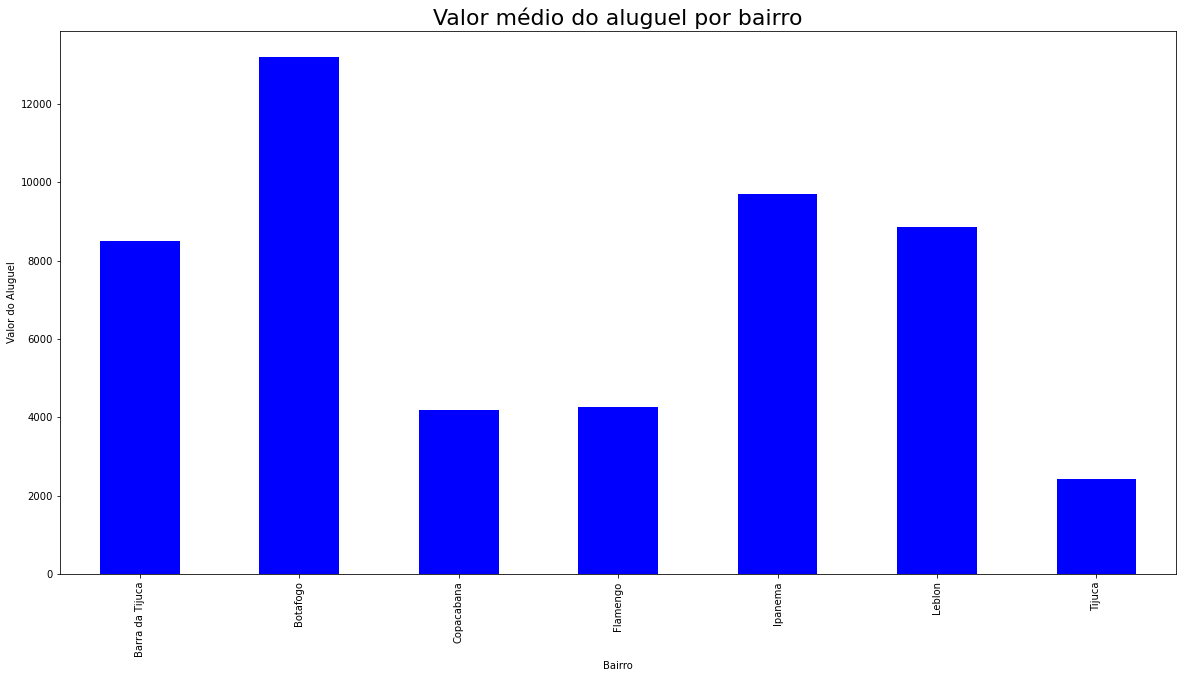

In [103]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do aluguel por bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor máximo do aluguel por bairro')

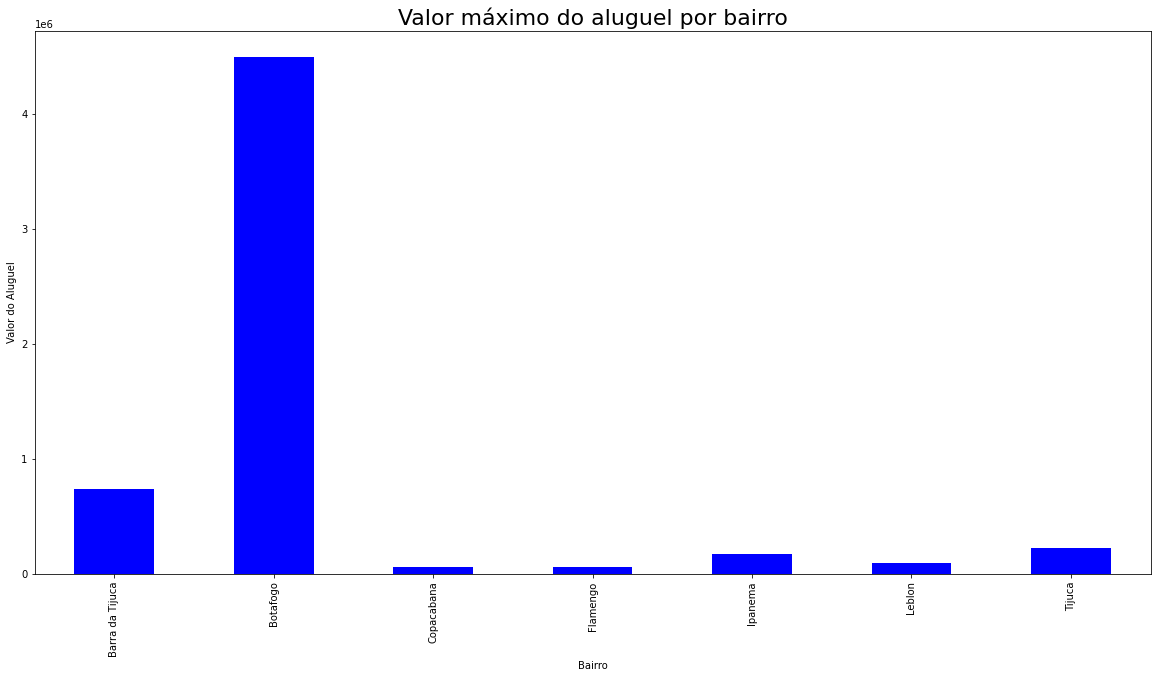

In [104]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor máximo do aluguel por bairro', {'fontsize': 22})